In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Generate two sets, one centered around 0,0; the other centered around 3,3

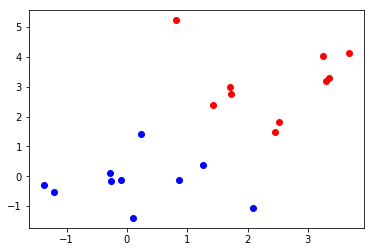

In [55]:
N = 10
p1 = np.random.randn(N,2)
p2 = np.random.randn(N,2) + [3,3]
plt.plot(p1[:,0], p1[:,1],'bo', p2[:,0], p2[:,1],'ro')

Build a "feature" vector $x$ out of the positions and a "label" vector $y$.

In [56]:
x = np.vstack((p1,p2))
y = np.hstack((np.ones(N), 2*np.ones(N)))

Now perform logisitc regression

In [57]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

And plot the predicted probs along the x,x line

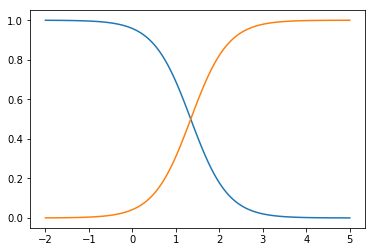

In [58]:
t = np.linspace(-2,5,100)
xtest = [[i,i] for i in t]
ytest = log_reg.predict_proba(xtest)

plt.plot(t, ytest)

Use some plotting magic from "the book" (https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb) to draw the decision boundary

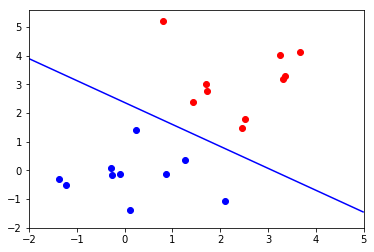

In [63]:
x0, x1 = np.meshgrid(
        np.linspace(-2, 5, 500).reshape(-1, 1),
        np.linspace(-2, 5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

zz = y_proba[:, 1].reshape(x0.shape)
plt.plot(p1[:,0], p1[:,1],'bo', p2[:,0], p2[:,1],'ro')
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg, levels=[0.5])